In [21]:
import pandas as pd
import fastparquet
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import numpy as np
import warnings
import random
warnings.filterwarnings("ignore")

In [22]:
figures = pd.read_parquet('../data/figures.parquet', engine='fastparquet')
submissions = pd.read_csv('../data/submissions.csv')

In [23]:
submissions.head()

,adsh,cik,sic,form,period,accepted,version,amendment_adsh,is_amended,ticker,start,end,start_2,end_2,start_3,end_3,start_4,end_4
0,141057824001617,1750,3720,10-Q,2024-08-31,2024-09-23 17:45:00,2024,0,False,air,2024-06-01,2024-08-31,NaN,NaN,2023-06-01,2023-08-31,NaN,NaN
1,110465924080890,1750,3720,10-K,2024-05-31,2024-07-18 17:43:00,2023,0,False,air,2023-06-01,2024-05-31,NaN,NaN,2022-06-01,2023-05-31,NaN,NaN
2,110465924037408,1750,3720,10-Q,2024-02-29,2024-03-21 17:26:00,2023,0,False,air,2023-06-01,2024-02-29,2023-12-01,2024-02-29,2022-06-01,2023-02-28,2022-12-01,2023-02-28
3,110465923128321,1750,3720,10-Q,2023-11-30,2023-12-21 17:20:00,2023,0,False,air,2023-06-01,2023-11-30,2023-09-01,2023-11-30,2022-06-01,2022-11-30,2022-09-01,2022-11-30
4,110465923103944,1750,3720,10-Q,2023-08-31,2023-09-26 17:14:00,2023,0,False,air,2023-06-01,2023-08-31,NaN,NaN,2022-06-01,2022-08-31,NaN,NaN


In [ ]:
# Merge datasets on 'adsh'
merged_data = pd.merge(figures, submissions, on='adsh')

# Filter for annual filings (10-K)
annual_filings = merged_data[merged_data['form'] == '10-K']

# Display the first few rows
annual_filings.head()

In [ ]:
# List of columns to drop
columns_to_drop = [
    'start_2', 'end_2', 
    'start_3', 'end_3', 
    'start_4', 'end_4', 
    'quarterly_figure', 
    'reported_figure_py', 
    'quarterly_figure_py'
]

# Drop the specified columns
data = annual_filings.drop(columns=columns_to_drop)

In [8]:
# Ensure the 'period' column is in datetime format
data['period'] = pd.to_datetime(data['period'])

# Filter rows where the period is after 2016
# filtered_data = data[data['period'] > '2016-12-31']

In [32]:
# Just looked if the netincome value is aligned with the actual netincome reported
data[(data["ticker"] == "msft") &  (data["tag"] == "NetIncomeLoss")]


,adsh,tag,reported_figure,computed,cik,sic,period,accepted,version,ticker,start,end
1540507,119312514289961,NetIncomeLoss,2.207400e+10,False,789019,7372,2014-06-30,2014-07-31 17:17:00,2013,msft,2013-07-01,2014-06-30
2590050,119312515272806,NetIncomeLoss,1.219300e+10,False,789019,7372,2015-06-30,2015-07-31 15:08:00,2015,msft,2014-07-01,2015-06-30
3224408,119312516662209,NetIncomeLoss,1.679800e+10,False,789019,7372,2016-06-30,2016-07-28 16:12:00,2016,msft,2015-07-01,2016-06-30
4121914,156459017014900,NetIncomeLoss,2.120400e+10,False,789019,7372,2017-06-30,2017-08-02 16:15:00,2017,msft,2016-07-01,2017-06-30
4796897,156459018019062,NetIncomeLoss,1.657100e+10,False,789019,7372,2018-06-30,2018-08-03 11:04:00,2018,msft,2017-07-01,2018-06-30
4888433,156459019027952,NetIncomeLoss,3.924000e+10,False,789019,7372,2019-06-30,2019-08-01 16:10:00,2018,msft,2018-07-01,2019-06-30
6291519,156459020034944,NetIncomeLoss,4.428100e+10,False,789019,7372,2020-06-30,2020-07-30 20:45:00,2020,msft,2019-07-01,2020-06-30
6405516,156459021039151,NetIncomeLoss,6.127100e+10,False,789019,7372,2021-06-30,2021-07-29 16:22:00,2020,msft,2020-07-01,2021-06-30
8083556,156459022026876,NetIncomeLoss,7.273800e+10,False,789019,7372,2022-06-30,2022-07-28 16:06:00,2022,msft,2021-07-01,2022-06-30
8434764,95017023035122,NetIncomeLoss,7.236100e+10,False,789019,7372,2023-06-30,2023-07-27 16:02:00,2023,msft,2022-07-01,2023-06-30


# Variable Explanation

- **`adsh`**: Accession number of the SEC filing.
- **`cik`**: Unique company identifier assigned by the SEC.
- **`sic`**: Industry classification code for the company.
- **`ticker`**: Stock ticker symbol (e.g., AAPL for Apple).
- **`form`**: SEC filing type (e.g., 10-K for annual reports).
- **`period`**: Fiscal period end date (YYYY-MM-DD).
- **`accepted`**: Date and time when the filing was accepted.
- **`amendment_adsh`**: Accession number of an amended filing.
- **`is_amended`**: Boolean indicating if the filing is an amendment.
- **`version`**: XBRL taxonomy version used for tagging.
- **`tag`**: Accounting tag (e.g., `NetIncomeLoss`).
- **`reported_figure`**: Numeric value of the reported financial item.
- **`computed`**: Boolean indicating if the value is computed.
- **`start`**: Start date of the reporting period (YYYY-MM-DD).
- **`end`**: End date of the reporting period (YYYY-MM-DD).


In [18]:
data.isna().sum()

adsh               0
tag                0
reported_figure    0
computed           0
cik                0
sic                0
form               0
period             0
accepted           0
version            0
amendment_adsh     0
is_amended         0
ticker             0
start              0
end                0
dtype: int64

In [ ]:
# Number of companies in the dataset
data["ticker"].nunique()

5077

In [ ]:
# Size is pretty large (>1.5gb)
data.to_csv("../data/annual_filings.csv")

-----------------------------------------

In [ ]:
data = pd.read_csv("../data/annual_filings.csv")

In [ ]:
data.drop(columns=["Unnamed: 0"], inplace=True)

data.drop(columns=["is_amended", "amendment_adsh", "form", "version", "accepted", "start", "end", "computed"], inplace=True)

# make period to datetime format
data["period"] = pd.to_datetime(data["period"])


In [5]:
# Reshape the data into the desired format
reshaped_data = data.pivot(index=['adsh', 'cik', 'sic', 'period', 'ticker'], 
                        columns='tag', 
                        values='reported_figure')

In [9]:
# get me the distribution in percentage of the missing values per column 
missing_values = reshaped_data.isna().sum() / reshaped_data.shape[0] * 100
missing_values = missing_values.sort_values(ascending=False)

In [ ]:
reshaped_data.isna().sum().sum() / (reshaped_data.shape[1] * reshaped_data.shape[0])

np.float64(0.9722388536667368)

In [19]:
reshaped_data.shape[1]

7963

In [26]:
reshaped_data.reset_index(inplace=True)
reshaped_data.head()

tag,adsh,cik,sic,period,ticker,AcceleratedShareRepurchaseProgramAdjustment,AcceleratedShareRepurchasesAdjustmentToRecordedAmount,AcceleratedShareRepurchasesSettlementPaymentOrReceipt,AccountsAndFinancingReceivableAllowanceForCreditLoss,AccountsAndNotesReceivableNet,...,WeightedAverageNumberOfSharesRestrictedStock,WeightedAverageNumberOfSharesTreasuryStock,WeightedAverageNumerDilutedLimitedPartnershipUnitsOutstandingAdjustment,WellServiceExpense,WorkersCompensationDiscountAmount,WorkersCompensationLiabilityCurrent,WorkersCompensationLiabilityCurrentAndNoncurrent,WorkersCompensationLiabilityNoncurrent,WriteOffOfDeferredDebtIssuanceCost,WriteOffOfInventory
0,217812000010,2178,5172,2011-12-31,ae,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,217813000014,2178,5172,2012-12-31,ae,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,217814000010,2178,5172,2013-12-31,ae,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,217815000014,2178,5172,2014-12-31,ae,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,217816000064,2178,5172,2015-12-31,ae,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
(missing_values > 50).sum()

np.int64(7844)

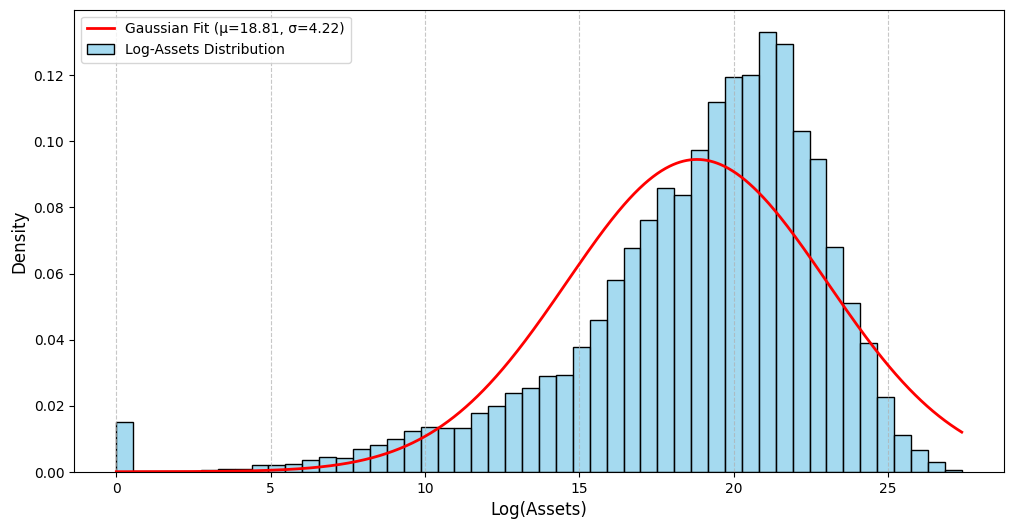

In [58]:

# Apply a log transformation to the Assets column to handle skewness
reshaped_data['Log_Assets'] = np.log1p(reshaped_data['Assets'])

from scipy.stats import norm
import numpy as np

# Generate histogram and Gaussian fit
plt.figure(figsize=(12, 6))
sns.histplot(reshaped_data['Log_Assets'], kde=False, bins=50, color='skyblue', stat="density", label="Log-Assets Distribution")

# Fit and plot Gaussian distribution
mean, std = reshaped_data['Log_Assets'].mean(), reshaped_data['Log_Assets'].std()
x = np.linspace(reshaped_data['Log_Assets'].min(), reshaped_data['Log_Assets'].max(), 1000)
gaussian = norm.pdf(x, mean, std)
plt.plot(x, gaussian, color='red', lw=2, label=f'Gaussian Fit (μ={mean:.2f}, σ={std:.2f})')

# Add title and labels
# plt.title('Log-Transformed Assets vs Gaussian Distribution', fontsize=14)
plt.xlabel('Log(Assets)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()





In [63]:
reshaped_data["sic"].value_counts().sort_values(ascending=False)

sic
2834    4257
7372    1810
3841    1226
2836    1198
7389    1168
        ... 
3452       3
3444       3
3960       1
3567       1
7385       1
Name: count, Length: 372, dtype: int64

In [64]:
reshaped_data["sic"].nunique()

372

In [34]:
data[(data["ticker"] == "aapl") & (data["reported_figure"] == int("114,301,000".replace(",", "") + "000"))]


,adsh,tag,reported_figure,cik,sic,period,ticker
8358142,32019323000106,OperatingIncomeLoss,1.143010e+11,320193,3571,2023-09-30,aapl


In [30]:
data[(data["ticker"] == "aapl") & (data["reported_figure"] == int("125,820,000".replace(",", "") + "000"))]


,adsh,tag,reported_figure,cik,sic,period,ticker
